In [65]:
#import dependencies
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import dataframe_image as dfi

In [2]:
#clean data
wine_dataframe=pd.read_csv("Resources/wine_dataset.csv")
wine_dataframe_clean=wine_dataframe.drop(["Unnamed: 0","region_2", "description","designation"], axis=1)
wine_dataframe_clean

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


In [3]:
clean_wine_data=wine_dataframe_clean.dropna()
clean_wine_data

,country,points,price,province,region_1,variety,winery
0,US,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,Provence red blend,Domaine de la BÃ©gude
...,...,...,...,...,...,...,...
150925,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Feudi di San Gregorio
150926,France,91,27.0,Champagne,Champagne,Champagne Blend,H.Germain
150927,Italy,91,20.0,Southern Italy,Fiano di Avellino,White Blend,Terredora
150928,France,90,52.0,Champagne,Champagne,Champagne Blend,Gosset


<IPython.core.display.Javascript object>


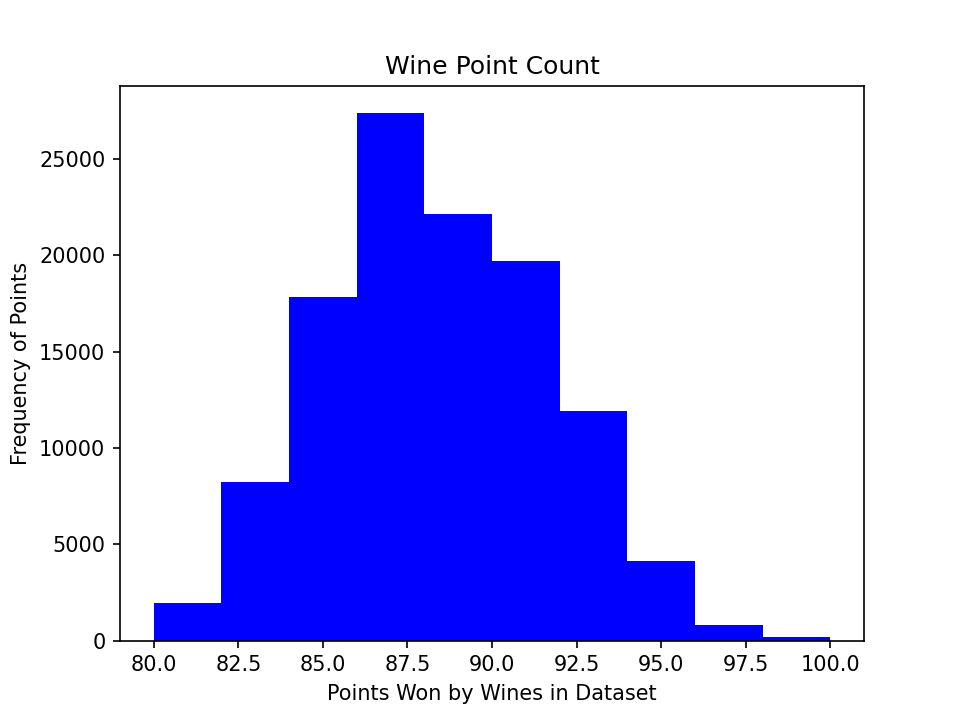

In [4]:
#points breakdown overall histogram
points_count=clean_wine_data["points"].value_counts().tolist()
points_labels=clean_wine_data["points"].unique()
points_labels
points_count

#chart for point breakdown overall
plt.hist(clean_wine_data.points, color='b')

plt.title("Wine Point Count")
plt.xlabel("Points Won by Wines in Dataset")
plt.ylabel("Frequency of Points")
plt.savefig("Images/histogram_points.png")

In [5]:
#summary statistics for points
summary_stat_points=clean_wine_data["points"].describe()
summary_stat_points

count    114393.000000
mean         87.855061
std           3.284661
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [6]:
#boxplot to display outliers and how point breakdown compares to the different countries

country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()
country_list=country_labels.tolist()

country_list

point_list=[]

for country in country_list:
    
    points_final= clean_wine_data.loc[clean_wine_data["country"]==country,"points"]
    point_list.append(points_final)
    
    quartiles = points_final.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = points_final.loc[( points_final < lower_bound) | (points_final > upper_bound)]
    print(f"{country}'s potential outliers: {outliers}")

US's potential outliers: 2149       98
10006      98
14571      98
19354     100
19356      99
         ... 
142697     98
143522    100
143523     99
143524     98
143525     98
Name: points, Length: 76, dtype: int64
Spain's potential outliers: 6005      97
10538     98
10595     97
23766     97
53907     97
68239     97
70169     97
90441     97
94649     97
113029    97
130889    97
135709    97
140176    98
Name: points, dtype: int64
France's potential outliers: 2145      100
26296     100
26297      99
34920      99
51886     100
51887      99
68237      99
83536     100
83537      99
113027     99
135707     99
Name: points, dtype: int64
Italy's potential outliers: 10        95
2146      99
2147      98
2150      97
2449      96
          ..
150543    82
150549    82
150552    82
150556    81
150557    81
Name: points, Length: 501, dtype: int64
Argentina's potential outliers: 10619     95
10879     95
22117     95
63764     96
63766     96
65331     97
65474     95
65476     95
8

<IPython.core.display.Javascript object>


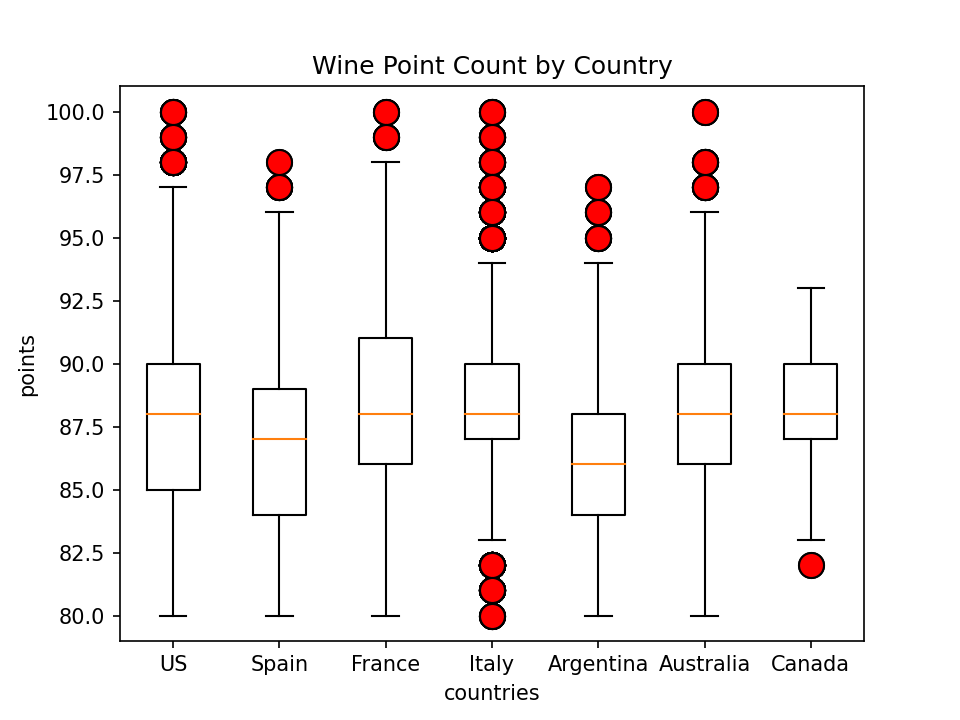

In [7]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(point_list, labels = country_list,flierprops=orange_out)
plt.ylabel('points')
plt.xlabel('countries')
plt.title("Wine Point Count by Country")
plt.show()
plt.savefig("Images/boxplot_points.png")

In [8]:
#wine with most points by (what winery it comes from, what variety and what country)
winepoint_max=(clean_wine_data.points).idxmax()
wine_var_pop=clean_wine_data.loc[winepoint_max,'variety']

wine_country_pop=clean_wine_data.loc[winepoint_max,'country']

wine_winery_pop=clean_wine_data.loc[winepoint_max,'winery']

wine_most_points= (wine_var_pop,wine_country_pop,wine_winery_pop)
wine_most_points

('Bordeaux-style White Blend', 'France', 'ChÃ¢teau Haut-Brion')

In [9]:
#wine highest price (what winery it comes from, what variety and what country)
wine_price_max=(clean_wine_data.price).idxmax()
wine_var_price=clean_wine_data.loc[wine_price_max,'variety']

wine_country_price=clean_wine_data.loc[wine_price_max,'country']

wine_winery_price=clean_wine_data.loc[wine_price_max,'winery']

wine_highest_price= (wine_var_price,wine_country_price,wine_winery_price)
wine_highest_price

('Bordeaux-style Red Blend', 'France', 'ChÃ¢teau Latour')

In [10]:
#wine with lowest points
winepoint_min=(clean_wine_data.points).idxmin()
wine_var_popmin=clean_wine_data.loc[winepoint_min,'variety']

wine_country_popmin=clean_wine_data.loc[winepoint_min,'country']

wine_winery_popmin=clean_wine_data.loc[winepoint_min,'winery']

wine_lowest_price=(wine_var_popmin,wine_country_popmin,wine_winery_popmin)
wine_lowest_price

('Chardonnay', 'Argentina', 'Tres Exilios')

In [11]:
#cheapest wine
wine_price_min=(clean_wine_data.price).idxmin()
wine_var_pricemin=clean_wine_data.loc[wine_price_min,'variety']

wine_country_pricemin=clean_wine_data.loc[wine_price_min,'country']

wine_winery_pricemin=clean_wine_data.loc[wine_price_min,'winery']

wine_lowest_points=(wine_var_pricemin,wine_country_pricemin,wine_winery_pricemin)
wine_lowest_points

('Chardonnay', 'US', "Pam's Cuties")

In [12]:
#number of varieties in the dataset
variety_count=clean_wine_data["variety"].value_counts().tolist()
variety_labels=clean_wine_data["variety"].unique()
variety_num=len(variety_labels)
variety_num


460

In [13]:
#most popular variety or varieties
variety_count_pop=clean_wine_data["variety"].value_counts()
variety_count_pop

Pinot Noir                      12193
Chardonnay                      12104
Cabernet Sauvignon              10955
Red Blend                        8181
Syrah                            5075
                                ...  
Malbec-Cabernet Franc               1
Grolleau                            1
Magliocco                           1
Pinot Grigio-Sauvignon Blanc        1
Garnacha Tintorera                  1
Name: variety, Length: 460, dtype: int64

In [14]:
#number of wineries in the dataset
winery_count=clean_wine_data[["country","winery"]].value_counts()
winery_labels=clean_wine_data["winery"].unique()

number_winery=len(winery_labels)
number_winery

11859

In [15]:
#most popular winery (find where it is located?)
winery_count_pop=clean_wine_data[["winery"]].value_counts()
winery_count_pop

winery                      
Williams Selyem                 371
Testarossa                      274
Chateau Ste. Michelle           225
Columbia Crest                  216
Kendall-Jackson                 216
                               ... 
ChÃ¢teau Bellevue Canterrane      1
Fuchsia                           1
Fuente del Conde                  1
Fulvio Luigi Serni                1
Henry Brochard                    1
Length: 11859, dtype: int64

In [16]:
#winery count by country
winery_count=clean_wine_data[["country","winery"]].value_counts()
winery_labels=clean_wine_data["winery"].unique()
winery_count


country  winery                     
US       Williams Selyem                371
         Testarossa                     274
         Chateau Ste. Michelle          225
         Columbia Crest                 216
         Kendall-Jackson                216
                                       ... 
         Clendenen Family                 1
France   ChÃ¢teau Moulin de Vignolle      1
         ChÃ¢teau Moulin de Mallet        1
US       Clendenen                        1
France   ChÃ¢teau Bois Redon              1
Length: 11941, dtype: int64

In [28]:
#what wineries produce what varieties and the average score and price of the wine variety
winery_variety=clean_wine_data.groupby(["winery","variety"]).mean()
winery_variety

points      price
winery               variety                                 
1+1=3                Cabernet Sauvignon  83.000000  17.333333
                     RosÃ©               82.000000  18.000000
                     Sparkling Blend     85.750000  13.000000
10 Knots             Chardonnay          86.000000  21.000000
                     Grenache            81.000000  35.000000
...                                            ...        ...
Ã‰cluse              Zinfandel           92.000000  38.000000
Ã‰levÃ©e Winegrowers Pinot Noir          92.500000  45.000000
Ã‰ric & JÃ¶el Durand Syrah               90.000000  39.000000
Ã€nima Negra         Red Blend           89.555556  50.777778
                     White Blend         85.000000  15.285714

[29817 rows x 2 columns]

In [29]:
#variety count by winery
variety_count_by_winery=clean_wine_data[["winery","variety"]].value_counts()
variety_count_by_winery

winery                 variety                 
Williams Selyem        Pinot Noir                  244
Testarossa             Pinot Noir                  148
Bouchard PÃ¨re & Fils  Pinot Noir                  117
Siduri                 Pinot Noir                  114
Testarossa             Chardonnay                  112
                                                  ... 
Drytown                RosÃ©                         1
                       Riesling                      1
                       Primitivo                     1
Saddle Ranch           Pinot Noir                    1
James Oatley           Sauvignon Blanc-Semillon      1
Length: 29817, dtype: int64

<IPython.core.display.Javascript object>


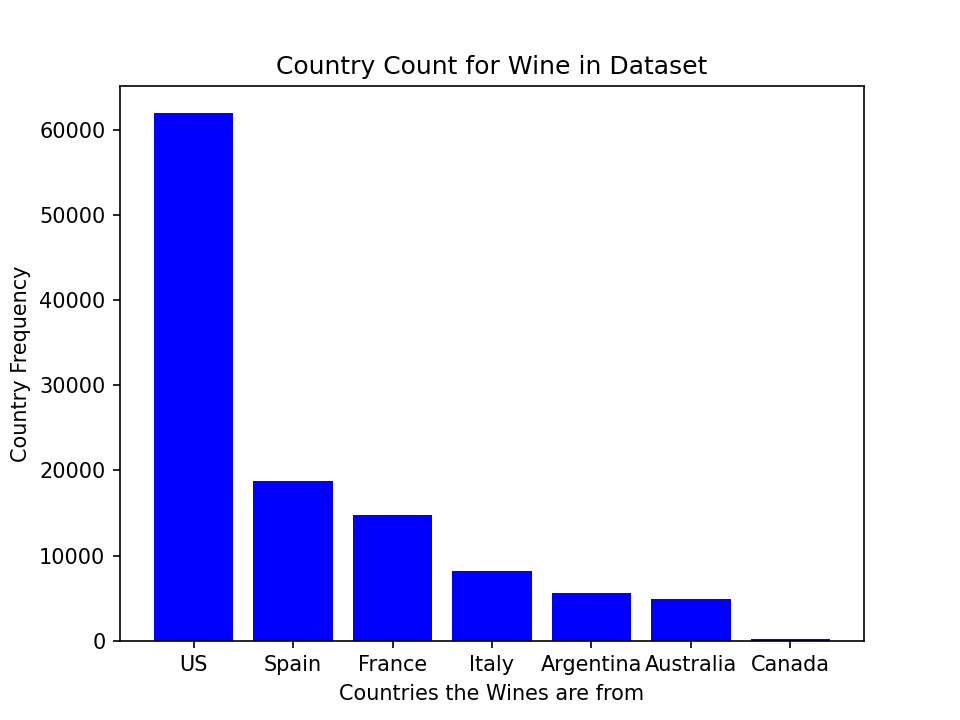

In [30]:
#chart displaying what countries have the most wines in the dataset

country_count=clean_wine_data["country"].value_counts()
country_labels=clean_wine_data["country"].unique()


#chart displaying what countries have the most wines in the dataset
plt.bar(country_labels,country_count, color='b')
plt.title("Country Count for Wine in Dataset")
plt.xlabel("Countries the Wines are from")
plt.ylabel("Country Frequency")
plt.savefig("Images/barchar_country.png")

In [25]:
#sort by country and then point break down and determine the percentage of wines that score well for each of the countries
usa_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="US")]
winery_breakdown_usa=usa_country_count["winery"].value_counts()
wineries_usa=len(winery_breakdown_usa)

spain_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Spain")]
winery_breakdown_spain=spain_country_count["winery"].value_counts()
wineries_spain=len(winery_breakdown_spain)

france_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="France")]
winery_breakdown_france=france_country_count["winery"].value_counts()
wineries_france=len(winery_breakdown_france)

italy_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Italy")]
winery_breakdown_italy=italy_country_count["winery"].value_counts()
wineries_italy=len(winery_breakdown_italy)

wineries_france

argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]
winery_breakdown_argentina=argentina_country_count["winery"].value_counts()
wineries_argentina=len(winery_breakdown_argentina)
wineries_argentina

520

In [52]:
wineries_list=[wineries_usa,wineries_spain,wineries_france,wineries_italy, wineries_argentina,wineries_canada, wineries_australia]

<IPython.core.display.Javascript object>


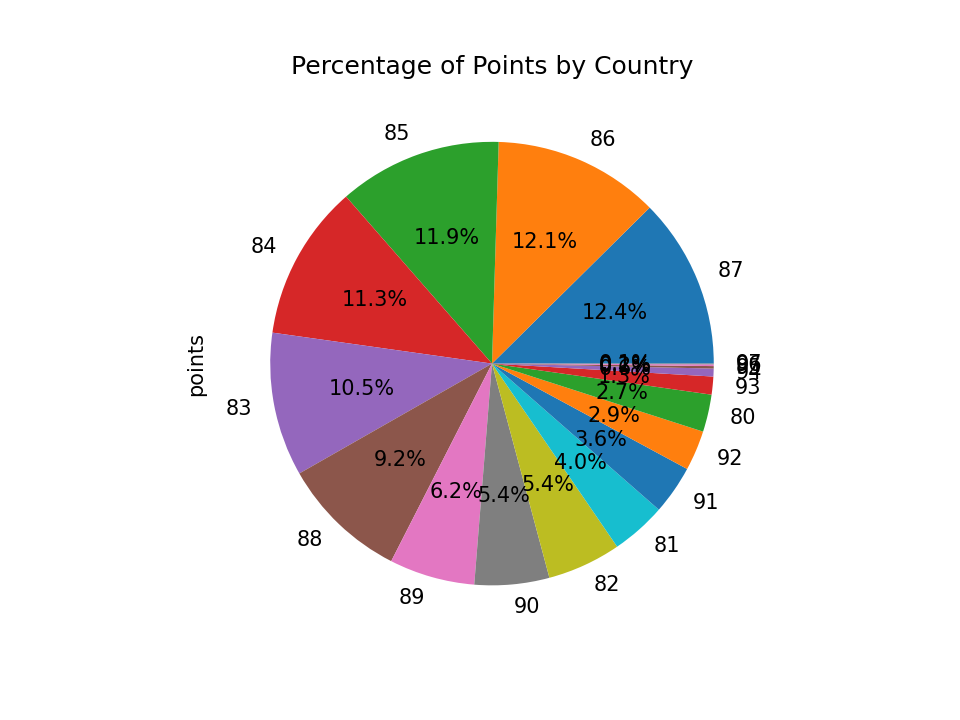

In [31]:
#distribution of points with percentage
argentina_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")]

argpie=argentina_country_count.points.value_counts()
argpie.plot(kind="pie",autopct='%1.1f%%')
plt.title("Percentage of Points by Country")
plt.show()
plt.savefig("Images/piechart_argentina.png")



In [19]:
#problem with canada doesnt makes sense the point breakdown 
canada_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Canada")]
point_breakdown_canada=canada_country_count["winery"].value_counts()
wineries_canada=len(point_breakdown_canada)
wineries_canada

40

In [24]:
australia_country_count=clean_wine_data.loc[(clean_wine_data["country"]=="Australia")]
point_breakdown_australia=australia_country_count["winery"].value_counts()
wineries_australia=len(point_breakdown_australia)
wineries_australia

550

array([[4734, 1430, 2440, 2227,  520,   40,  550]])

In [32]:
#summary statistics for price
summary_stat_price=clean_wine_data["price"].describe()
summary_stat_price

count    114393.000000
mean         34.657916
std          37.266912
min           4.000000
25%          17.000000
50%          25.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

In [33]:
#original count
count_us=len(clean_wine_data.loc[(clean_wine_data["country"]=="US")])
count_italy=len(clean_wine_data.loc[(clean_wine_data["country"]=="Italy")])
count_spain=len(clean_wine_data.loc[(clean_wine_data["country"]=="Spain")])
count_france=len(clean_wine_data.loc[(clean_wine_data["country"]=="France")])
count_argentina=len(clean_wine_data.loc[(clean_wine_data["country"]=="Argentina")])
count_canada=len(clean_wine_data.loc[(clean_wine_data["country"]=="Canada")])
count_australia=len(clean_wine_data.loc[(clean_wine_data["country"]=="Australia")])


In [34]:
#wines with scores higher than 88 points from each country
greater_than_average=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_than_average
#finding percentage which countries that have wineries with above average wine
greater_count_us=len(greater_than_average.loc[(greater_than_average["country"]=="US")])
greater_count_italy=len(greater_than_average.loc[(greater_than_average["country"]=="Italy")])
greater_count_spain=len(greater_than_average.loc[(greater_than_average["country"]=="Spain")])
greater_count_france=len(greater_than_average.loc[(greater_than_average["country"]=="France")])
greater_count_argentina=len(greater_than_average.loc[(greater_than_average["country"]=="Argentina")])
greater_count_canada=len(greater_than_average.loc[(greater_than_average["country"]=="Canada")])
greater_count_australia=len(greater_than_average.loc[(greater_than_average["country"]=="Australia")])

In [35]:
#finding percentage which countries that have wineries with above average wine
usa_percent=(greater_count_us/count_us)*100

italy_percent=(greater_count_italy/count_italy)*100

spain_percent=(greater_count_spain/count_spain)*100

france_percent=(greater_count_france/count_france)*100

argentina_percent=(greater_count_argentina/count_argentina)*100

canada_percent=(greater_count_canada/count_canada)*100

australia_percent=(greater_count_australia/count_australia)*100
australia_percent

54.51573355128729

In [36]:
#finding percentage with wineries below average 
#wines with scores lower than 88 points
less_than_average=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
less_than_average

#finding percentage which countries that have wineries with above average wine
lesser_count_us=len(less_than_average.loc[(less_than_average["country"]=="US")])
lesser_count_italy=len(less_than_average.loc[(less_than_average["country"]=="Italy")])
lesser_count_spain=len(less_than_average.loc[(less_than_average["country"]=="Spain")])
lesser_count_france=len(less_than_average.loc[(less_than_average["country"]=="France")])
lesser_count_argentina=len(less_than_average.loc[(less_than_average["country"]=="Argentina")])
lesser_count_canada=len(less_than_average.loc[(less_than_average["country"]=="Canada")])
lesser_count_australia=len(less_than_average.loc[(less_than_average["country"]=="Australia")])

In [37]:
#finding percentage which countries that have wineries with below average wine
usa_percent_below=(lesser_count_us/count_us)*100

italy_percent_below=(lesser_count_italy/count_italy)*100

spain_percent_below=(lesser_count_spain/count_spain)*100

france_percent_below=(lesser_count_france/count_france)*100

argentina_percent_below=(lesser_count_argentina/count_argentina)*100

canada_percent_below=(lesser_count_canada/count_canada)*100

australia_percent_below=(lesser_count_australia/count_australia)*100
australia_percent_below

57.51941152431549

In [61]:
usa=[wineries_usa,usa_percent,usa_percent_below]
italy=[wineries_italy,italy_percent,italy_percent_below]
spain=[wineries_spain,spain_percent, spain_percent_below]
france=[wineries_france,france_percent, france_percent_below]
argentina=[wineries_argentina, argentina_percent, argentina_percent_below]
canada=[wineries_canada, canada_percent, canada_percent_below]
australia=[wineries_australia, australia_percent, australia_percent_below]

In [62]:
winery_array=np.array([usa, italy,spain,france,argentina,canada,australia])
winery_array

array([[4734.        ,   50.67980582,   59.78259116],
       [2227.        ,   58.03875639,   56.28726576],
       [1430.        ,   37.45098039,   74.15441176],
       [2440.        ,   61.57021997,   51.10659898],
       [ 520.        ,   29.64356081,   79.59878202],
       [  40.        ,   63.40206186,   50.51546392],
       [ 550.        ,   54.51573355,   57.51941152]])

In [63]:
#creating a dataframe to compare percentages
percentage_df = pd.DataFrame(winery_array, columns = ['Winery Count','Percent of Wine Above Average','Percent of Wine Below Average'], index = ['USA', 'Italy','Spain','France','Argentina','Canada','Australia'])

percentage_df

,Winery Count,Percent of Wine Above Average,Percent of Wine Below Average
USA,4734.0,50.679806,59.782591
Italy,2227.0,58.038756,56.287266
Spain,1430.0,37.450980,74.154412
France,2440.0,61.570220,51.106599
Argentina,520.0,29.643561,79.598782
Canada,40.0,63.402062,50.515464
Australia,550.0,54.515734,57.519412


In [66]:
dfi.export(percentage_df, 'Images/dataframe.png')

In [41]:
#prices of wine with points above average points

price_greater_than=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
greater_price_count=price_greater_than["price"].value_counts()
greater_price_count

30.0     2871
20.0     2700
25.0     2671
40.0     2566
50.0     2490
         ... 
451.0       1
217.0       1
525.0       1
158.0       1
178.0       1
Name: price, Length: 331, dtype: int64

In [42]:
#finding prices of wines below average 
price_less_than=clean_wine_data.loc[(clean_wine_data["points"]<=88)]
points_prices=price_less_than["price"].value_counts()
points_prices

15.0     4807
20.0     4660
18.0     4005
10.0     3738
12.0     3463
         ... 
230.0       1
215.0       1
147.0       1
167.0       1
142.0       1
Name: price, Length: 141, dtype: int64

In [43]:
#determining correlation of points and price 
wine_correlation=clean_wine_data.corr()
wine_correlation

,points,price
points,1.000000,0.464059
price,0.464059,1.000000


<IPython.core.display.Javascript object>


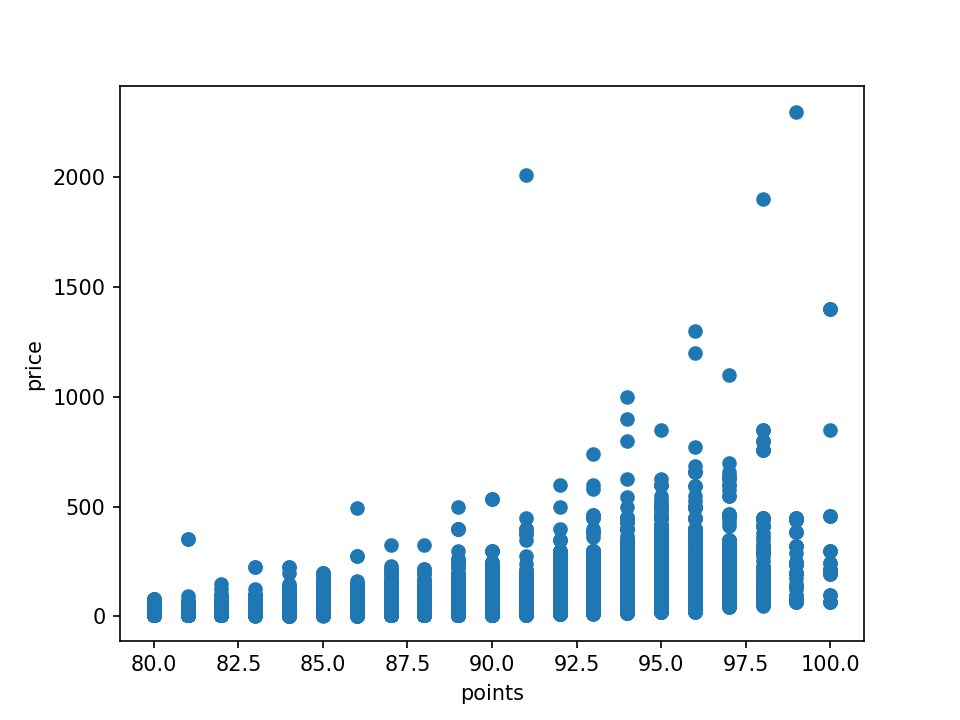

In [40]:
#scatter plot of the price by point value
plt.scatter(clean_wine_data.iloc[:,1],clean_wine_data.iloc[:,2])
plt.xlabel("points")
plt.ylabel("price")
plt.show()
plt.savefig("Images/scatterplot.png")

In [44]:
#grouping the wines by variety and determining the average price and points for that variety 
price_filter_df=clean_wine_data.loc[(clean_wine_data["points"]>=88)]
variety_grouped_price_points=price_filter_df.groupby(["variety"]).mean()
variety_grouped_price_points

,points,price
variety,,
Aglianico,89.907514,38.606936
Albana,91.272727,42.181818
AlbariÃ±o,89.233716,20.773946
Albarossa,88.000000,40.000000
Aleatico,92.000000,50.000000
...,...,...
White Riesling,91.437500,27.125000
Xarel-lo,89.000000,37.166667
Zibibbo,92.500000,38.055556


In [45]:
#average price and points of wine per country
country_grouped_price_points=clean_wine_data.groupby(["country"]).mean()
country_grouped_price_points

,points,price
country,,
Argentina,86.000000,20.793122
Australia,87.881488,31.258480
Canada,88.221649,34.628866
France,88.604467,45.640745
Italy,88.445006,37.547913
Spain,86.638725,27.048529
US,87.821638,33.683531


In [46]:
#Average points and price per variety in each country
grouped_country_variety_price_point=clean_wine_data.groupby(["country","variety"]).mean()
grouped_country_variety_price_point

points      price
country   variety                                         
Argentina Barbera                     85.000000  18.000000
          Bonarda                     86.225166  15.026490
          Bordeaux-style Red Blend    89.500000  45.382353
          Bordeaux-style White Blend  83.000000  14.000000
          Cabernet Blend              89.750000  29.375000
...                                         ...        ...
US        Viognier-ValdiguiÃ©         84.000000  17.000000
          White Blend                 87.059542  20.389313
          White Riesling              88.125000  20.843750
          Zinfandel                   86.665522  26.758785
          Zweigelt                    87.333333  25.666667

[800 rows x 2 columns]